In [5]:
import sys
from dynamics import BistableND, DuffingOscillator
from distributions import MultivariateGaussian, multiscaler
import torch
import matplotlib.pyplot as plt

In [2]:
dynamics = BistableND(dim=2,bistable_axis=0)
distribution = MultivariateGaussian(dim=2)

In [3]:
distribution._covariance_matrix

tensor([[1., 0.],
        [0., 1.]])

In [13]:
traj = dynamics.integrate(torch.randn(20,2),torch.linspace(0,1,10))

In [16]:
dynamics = DuffingOscillator()
traj = dynamics.integrate(torch.randn(20,2),torch.linspace(0,10,100))

In [6]:
dist = MultivariateGaussian(dim=2)
dists = multiscaler(dist, [0.1, 0.5, 1.0])

MultivariateGaussian(name='MultivariateGaussian2D', dim=2)

In [1]:
import torch
import sys
sys.path.append("../")
from src.dynamics.base import DynamicalSystem
from src.core.models import ResNet

class CubicBistable1D(DynamicalSystem):
    def __init__(self):
        super().__init__(dim=1, name="CubicBistable1D")

    def function(self, x: torch.Tensor) -> torch.Tensor:
        # x shape: (batch, 1)
        return torch.sin(x)


from src.core.separatrix_locator import SeparatrixLocator
from src.core.models import ResNet

dynamics = CubicBistable1D()

models = ResNet(
    input_dim=dynamics.dim,
    hidden_size=400,
    num_layers=20,
    output_dim=1,
    input_scale_factor=1,
).to("cuda")

locator = SeparatrixLocator(
    num_models=1,
    dynamics_dim=dynamics.dim,
    models=[models],
    epochs=200,
    device="cuda",
    verbose=True,
    lr=1e-4
)

# Choose a sampling distribution for initial conditions (mean 0, std 1)
# init_dist = torch.distributions.Normal(loc=torch.tensor([0.0],device="cuda"), scale=torch.tensor([2.0],device="cuda"))
init_dist = torch.distributions.Uniform(low=torch.tensor([-4.0],device="cuda"), high=torch.tensor([4.0],device="cuda"))

# Train models to learn Koopman eigenfunctions
locator.fit(dynamics.function, init_dist)

# # Prepare for gradient-based refinement and find separatrix
# locator.prepare_models_for_gradient_descent(init_dist)
# trajectories, separatrix_points = locator.find_separatrix(init_dist)


TypeError: Can't instantiate abstract class CubicBistable1D with abstract method get_attractors

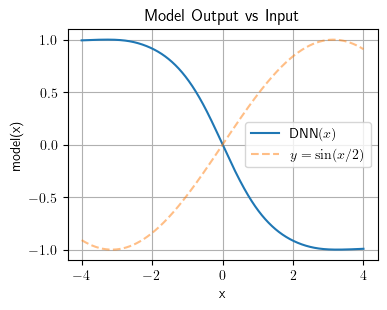

In [2]:
model = locator.models[0]
model.to('cpu')
import numpy as np
import matplotlib.pyplot as plt

x = torch.linspace(-4, 4, 1000)[:,None]
with torch.no_grad():
    y = model(x)

plt.figure(figsize=(4,3))
plt.plot(x, y, label=r'$\text{DNN}(x)$')
plt.plot(x, torch.sin(x/2), '--', label=r'$y=\sin(x/2)$', alpha=0.5)

plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('model(x)')
plt.title('Model Output vs Input')
plt.show()

